# ML 2021



In [1]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import pandas as pd

## Exercise 1

$$ \Omega = \{ HHH, HTH, HHT, THH, TTH, HTT, THT, TTT  \} $$
$$ F = \{ HHH, HTH, HHT, THH \}$$

## Exercise 2

$$ P(B) = P\bigl(B \cap \bigcup_i  A_i\bigr) = P\bigl(\bigcup_i (B \cap   A_i)\bigr) = \Sigma_i P(B \cap   A_i) = \Sigma_i P(B|A_i)P(A_i) $$

## Exercise 4 & 6 (together)

$$ PMF = \begin{cases}
      0.25 & X = 0\\
      0.5 & X = 1 \\
      0.25 & X = 2
    \end{cases}
$$

$$ CDF = \begin{cases}
      0 & X < 0 \\
      0.25 & 0 \leq X < 1\\
      0.75 & 1 \leq X < 2 \\
      1.0 & X \geq 2
    \end{cases}
$$


In [2]:
def toss(times):
    return np.sum(np.random.randint(0, 2, (2, times)), axis=0)

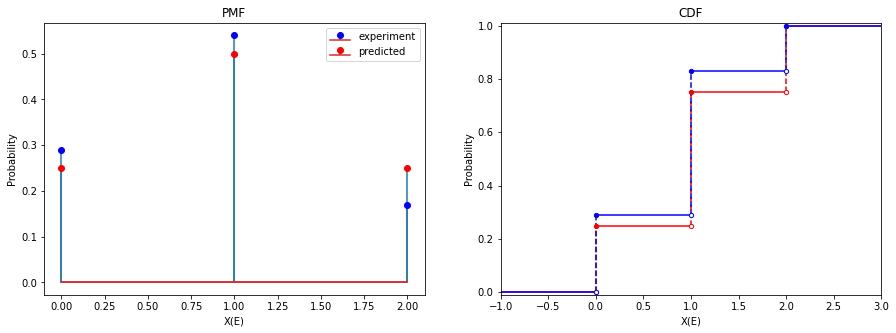

In [3]:
times = 100
tossed = toss(times)
vals, counts = np.unique(tossed, return_counts=True)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
ax1.stem(vals, counts / times, markerfmt='bo', label="experiment")
ax1.stem([.0, 1., 2.], [.25, .5, .25], markerfmt='ro', label="predicted")
ax1.legend()
ax1.set_xlabel("X(E)")
ax1.set_ylabel("Probability")
ax1.set_title("PMF")

pred_cum_counts = np.array([.25, .75, 1.])
exp_cum_counts = np.cumsum(counts / times)
vals = np.insert(vals, 0, -1)
vals = np.append(vals, 3)
for y, color in [(pred_cum_counts, 'red'), (exp_cum_counts, 'blue')]:
    yn = np.insert(y, 0, 0)
    ax2.hlines(y=yn, xmin=vals[:-1], xmax=vals[1:], color=color, zorder=1)
    ax2.vlines(x=vals[1:-1], ymin=yn[:-1], ymax=yn[1:], color=color, linestyle='dashed', zorder=1)
    ax2.scatter(vals[1:-1], y, color=color, s=18, zorder=2)
    ax2.scatter(vals[1:-1], yn[:-1], color='white', s=18, zorder=2, edgecolor=color)
ax2.grid(False)
ax2.set_xlim(vals[0], vals[-1])
ax2.set_ylim([-0.01, 1.01])
ax2.set_xlabel("X(E)")
ax2.set_ylabel("Probability")
ax2.set_title("CDF")

plt.show()

## Exercise 5

$$ PDF = \begin{cases}
    \frac{1}{a} & x \in [0, a] \\
    0 & \text{otherwise}
    \end{cases}$$

$$ CDF = \begin{cases}
    \frac{x}{a} & x \in [0, a] \\
    0 & \text{otherwise}
    \end{cases}$$


## Exercise 7

$$ E_{PE}[f] = \int\int L(f(x), y)p_{XY} dydx = \int p_{X} \int L(f(x), y)p_{Y|X} dydx $$
$$ L = E_{Y|X} [(f(x_0) - y)^2|x=x_0] $$
$$ f(x_0) = c $$
$$ \frac{d}{dc} E_{Y|X}[(c - y) ^ 2 |x=x_0] = 0 $$
$$ E_{Y|X}[2(c - y) |x=x_0] = 0 $$
$$ f^* = E_{Y|X}[y|x=x_0] $$

## Exercise 8

$$ E_{PE}[f] = \int\int L(f(x), y)p_{XY} dydx = \int p_{X} \int L(f(x), y)p_{Y|X} dydx $$
$$ L = E_{Y|X} [|f(x_0) - y|\;|x=x_0] $$
$$ f(x_0) = c $$
$$ \frac{d}{dc} E_{Y|X}[|c - y|\; |x=x_0] = 0 $$
$$ E_{Y|X}[sgn(c - y) |x=x_0] = 0 $$
$$ f^* = median(y|x=x_0) $$

## Exercise 12

$$ \text{Var}(X) = \text{E}[(X - \text{E[X]}^2] = \text{E}[X^2 - 2X\text{E}[X] + E[X]^2] = \text{E}[X^2] - 2\text{E}[X]\text{E}[X] + \text{E}[X]^2 = \text{E}[X^2] - \text{E}[X]^2$$

## Exercise 13

Let $X$ be uniformly distributed on $[x_0, x_1]$.

$$ E[X] = \int_{x_0}^{x_1} \frac{x}{x_1 - x_0} \text{d}x = \frac{x_0 + x_1}{2} $$

$$ E[X^2] - E^2[X] = \int_{x_0}^{x_1} \frac{x^2}{x_1 - x_0} \text{d}x - \frac{(x_0 + x_1)^2}{4} = \frac{x_1 - x_0}{12} $$

## Exercise 14

In [4]:
def mean(arr):
    assert(isinstance(arr, list))
    return sum(arr) / len(arr)

## Exercise 15

In [5]:
def var(x):
    assert(isinstance(arr, list))
    return sum([ el ** 2 for el in arr]) / len(arr) - mean(arr)

## Exercise 16

In [6]:
def euc_dist(v1, v2):
    assert(isinstance(v1, list))
    assert(isinstance(v2, list))
    return sum([(v1el - v2el) ** 2 for v1el, v2el in zip(v1, v2)]) ** .5

## Exercise 17

In [7]:
def taxicab_dist(v1, v2):
    assert(isinstance(v1, list))
    assert(isinstance(v2, list))
    return sum([abs(v1el - v2el) for v1el, v2el in zip(v1, v2)])

## Exercise 18

$|\Omega| = 2\cdot3\cdot3 = 18$

$$ PMF_{XY} = \begin{cases}
\frac{1}{18} & X = 1 \wedge Y \in \{2, 6\} \\
\frac{1}{9} &  X = 1 \wedge Y \in \{3, 5\} \\
\frac{1}{6} & X = 0 \vee X = 1 \wedge Y = 4 \\
\end{cases} $$ 

$$ p_x = \begin{cases}
\frac{1}{2} & X=0 \\
\frac{1}{2} & X=1
\end{cases} $$

$$ p_y = \begin{cases}
\frac{1}{18} & Y = 6 \\
\frac{1}{6} & Y\in\{1, 4\} \\
\frac{1}{9} & Y = 5 \\
\frac{2}{9} & Y = 2 \\
\frac{5}{18} & Y = 3
\end{cases}
$$

## Exercise 19


$$ CDF_{XY} = \begin{cases} 
0 & X < 0 \wedge Y < 1 \\
\frac{1}{6} & 1 \leq Y < 2   \\
\frac{1}{3} & 0 < X \leq 1 \wedge 2 \leq Y < 3 \\
\frac{1}{2} & 0 < X \leq 1 \wedge 3 \leq Y  \\
\frac{7}{18} & X \geq 1 \wedge 2 \leq Y < 3 \\
\frac{2}{3} & X \geq 1 \wedge 3 \leq Y < 4 \\
\frac{5}{6} & X \geq 1 \wedge 4 \leq Y < 5 \\
\frac{17}{18} & X \geq 1 \wedge 5 \leq Y < 6 \\
1 & X \geq 1 \wedge Y \geq 6 \\
\end{cases} $$

$$F_x = \begin{cases} 
0 & X < 0 \\
\frac{1}{2} & 0 \leq X < 1 \\
1 & X \geq 1
\end{cases}$$

$$F_y = \begin{cases} 
0 & Y < 1 \\
\frac{1}{6} & 1 \leq Y < 2 \\
\frac{7}{18} & 2 \leq Y < 3 \\
\frac{2}{3} & 3 \leq Y < 4 \\
\frac{5}{6} & 4 \leq Y < 5 \\
\frac{17}{18} & 5 \leq Y < 6 \\
1 & Y> 6
\end{cases}$$

## Exercise 20


In [8]:
def toss_n_roll(times):
    coin = np.random.randint(0, 2, (1, times))
    die = np.random.randint(1, 4, (2, times))
    die[1,:] = np.where(coin > 0, die[1,:], 0)
    die = np.expand_dims(np.sum(die, axis=0), axis=0)
    print(die.shape)
    joint = np.concatenate((coin, die), axis=0).T
    return joint

In [9]:
times = 10000

In [10]:
vals, counts = np.unique(toss_n_roll(times), return_counts=True, axis=0)

(1, 10000)


In [11]:
for val, count in zip(vals, counts):
    print("Configuration X,Y: {} is in {:.2f} % probable".format(val, count / times * 100))

Configuration X,Y: [0 1] is in 16.86 % probable
Configuration X,Y: [0 2] is in 16.21 % probable
Configuration X,Y: [0 3] is in 16.89 % probable
Configuration X,Y: [1 2] is in 5.69 % probable
Configuration X,Y: [1 3] is in 10.98 % probable
Configuration X,Y: [1 4] is in 16.54 % probable
Configuration X,Y: [1 5] is in 11.26 % probable
Configuration X,Y: [1 6] is in 5.57 % probable


## Exercise 21

$$ PMF = \begin{cases}
\frac{1}{3} & X \neq Y \\
\frac{1}{6} & X = Y 
\end{cases} $$

$$p_x = \begin{cases}
\frac{1}{2} & X = 0 \\
\frac{1}{2} & X = 1 \\
\end{cases} $$

$$p_y = \begin{cases}
\frac{1}{2} & Y = 0 \\
\frac{1}{2} & Y = 1 \\
\end{cases} $$



$$ p_{Y|X}(r|X=1) = \begin{cases}
\frac{2}{3} & Y = 0 \\
\frac{1}{3} & Y = 1 
\end{cases} $$

$$ h(k) = p_{Y|X}(r|k) = \begin{cases}
\frac{2}{3} & k \neq Y \\
\frac{1}{3} & k = Y 
\end{cases} $$

## Exercise 22

$$ f_{XY} = \begin{cases} 
x + y & x,y \in (0,1)\\
0 & \text{otherwise}
\end{cases} $$

$$ f_{X} = \begin{cases} 
\int (x + y) dy = x + \frac{1}{2} & x,y \in (0,1)\\
0 & \text{otherwise}
\end{cases} $$

$$ f_{Y|X} = \begin{cases} 
\frac{x + y}{x + \frac{1}{2}} & x,y \in (0,1)\\
0 & \text{otherwise}
\end{cases} $$

$$ \int_0^1 f_{Y|X} dy = \frac{x+1/2}{x+1/2} = 1 $$

## Exercise 23

$$ \text{Cov}[X, Y] = \text{E}[(X - \text{E}[X])(Y - \text{E}[Y])] = \text{E}[XY - X\text{E}[Y] - Y\text{E}[X] + \text{E}[X]\text{E}[Y]] =\text{E}[XY] - \text{E}[X]\text{E}[Y] - \text{E}[Y]\text{E}[X] + \text{E}[X]\text{E}[Y] = \text{E}[XY] - \text{E}[X]\text{E}[Y]$$

$$ \text{Var[X+Y]} = \text{E}[(X + Y - E[X + Y]^2)] = \text{E}[(X+Y)^2] - \text{E}[X+Y]^2 = \text{E}[X^2] + 2\text{E}[XY] + \text{E}[Y^2] - \text{E}[X]^2 - 2\text{E}[X]\text{E}[Y] + \text{E}[Y]^2 = \text{Var}[X] + \text{Var}[Y] + \text{VCOV}[X, Y]$$

## Exercise 24

$$\text{E}[XY] = \text{E}[X^3] = \int_{-1}^{1} \frac{x^3}{1-(-1)} dx = 0 $$
$$\text{E}[X]\text{E}[Y] = \text{E}[X]\text{E}[X^2] = \int_{-1}^{1} \frac{x}{1-(-1)} dx \int_{-1}^{1} \frac{x^2}{1-(-1)} dx = \frac{1}{12}$$

- not independent: $\text{E}[X]\text{E}[Y] \neq \text{E}[X]\text{E}[Y]$
- correlated: $\text{COV}[X, Y] = \text{E}[XY] - \text{E}[X]\text{E}[Y] \neq 0$


## Exercise 25

$$ \text{E}[Y|1] = \sum_r r \cdot p_{Y|X}(r|1) = 0 \cdot \frac{2}{3} + 1 \cdot \frac{1}{3} = \frac{1}{3}$$
$$ \text{E}[Y|0] = \sum_r r \cdot p_{Y|X}(r|1) = 0 \cdot \frac{1}{3} + 1 \cdot \frac{2}{3} = \frac{2}{3}$$
$$ \text{Var}[Y|1] = \sum_r (r - \text{E}[Y|1]) ^ 2 \cdot p_{Y|X}(r|1) = (0-\frac{1}{3})^2 \cdot \frac{2}{3} + (1-\frac{1}{3})^2 \cdot \frac{1}{3} = \frac{2}{9}$$
$$ \text{Var}[Y|0] = \sum_r (r - \text{E}[Y|0]) ^ 2 \cdot p_{Y|X}(r|0) = (0-\frac{2}{3})^2 \cdot \frac{1}{3} + (1-\frac{2}{3})^2 \cdot \frac{2}{3} = \frac{2}{9}$$

## Exercise 26

In [12]:
def cov(v1, v2):
    assert(isinstance(v1, list))
    assert(isinstance(v2, list))
    assert(len(v1) == len(v2))
    xmean = mean(v1)
    ymean = mean(v2)
    return mean([(v1el - xmean) * (v2el - ymean) for v1el, v2el in zip(v1, v2)])

## Exercise 27

In [13]:
def cosine_similarity(v1, v2):
    assert(isinstance(v1, list))
    assert(isinstance(v2, list))
    return sum([ v1el * v2el for v1el, v2el in zip(v1, v2)]) / (sum([v1el ** 2 for v1el in v1]) * sum([v2el ** 2 for v2el in v2])) ** .5

## Exercise 28


In [14]:
from scipy.spatial.distance import cdist 
def mean_distance(dim, points_no):
    points = np.random.uniform(0, 1, (points_no, dim))
    points = pd.DataFrame(data=points, columns=["x{}".format(x) for x in range(dim)])
    dist_matrix = cdist(points , points)
    sorted_indices = np.argsort(dist_matrix)
    points = points.assign(distance=dist_matrix[sorted_indices[..., 0], sorted_indices[..., 1]], NN=sorted_indices[...,1])
    return points['distance'].mean()
    

In [15]:
# def mean_distance(dim, points_no):
#     points = np.random.uniform(0, 1, (points_no, dim))
#     return np.mean([np.sqrt(np.sum(np.square(points[i] - points[i+1]))) for i in range(0, points.shape[0] - 1)])


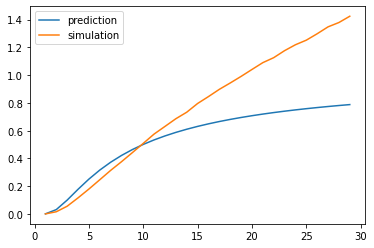

Dimension: 1
Simulated mean distance between neighbours 0.00050
Predicted mean distance between neighbours 0.00100
Needs 1.000000e+03 points to have the same distance as in 1D
------------------------------
Dimension: 2
Simulated mean distance between neighbours 0.01616
Predicted mean distance between neighbours 0.03162
Needs 1.000000e+06 points to have the same distance as in 1D
------------------------------
Dimension: 3
Simulated mean distance between neighbours 0.05589
Predicted mean distance between neighbours 0.10000
Needs 1.000000e+09 points to have the same distance as in 1D
------------------------------
Dimension: 10
Simulated mean distance between neighbours 0.50862
Predicted mean distance between neighbours 0.50119
Needs 1.000000e+30 points to have the same distance as in 1D
------------------------------


In [16]:
from scipy.optimize import curve_fit

points_no = 1000

def f(dim):
    return 1. / (points_no ** (1. / dim))
    
dist1d = 0.
xrange = np.arange(1, 30)
mean_distances = [mean_distance(dim, points_no) for dim in xrange]
# popt, pcov = curve_fit(f, xrange, mean_distances)
# a, b
plt.plot(xrange, f(xrange), label="prediction")
plt.plot(xrange, mean_distances, label="simulation")
plt.legend()
plt.show()
    

for dim in [1, 2, 3, 10]:    
    print("Dimension: {}".format(dim))
    print("Simulated mean distance between neighbours {:.5f}".format(mean_distances[dim-1]))
    print("Predicted mean distance between neighbours {:.5f}".format(1. / points_no ** (1. / dim)))
    points = points_no ** dim 
    print("Needs {:e} points to have the same distance as in 1D".format(points))
    print('-' * 30)


## Exercise 29

$$ \min_\theta\;\;\Vert{y-\theta^Tx}\Vert^2$$
$$ s.t. x\in\mathbb{R}^{n\times1}, y\in\mathbb{R}^{1\times1}, \theta\in\mathbb{R}^{n\times1}  $$
$$\frac{\partial}{\partial \theta}\Vert{y-\theta^Tx}\Vert^2 = 2(y-\theta^Tx)(-x^T) = 0$$
$$ yx^T=\theta^Txx^T $$
$$ \bar{\theta^T} = yx^T(xx^T)^{-1} $$

## Exercise 30

In [17]:
data = pd.read_csv("https://github.com/wkrzemien/dataScienceAndML2020/raw/master/datasets/data1.csv")

In [18]:
data.head()

,x,y,dataSet
0,10,8.04,0
1,8,6.95,0
2,13,7.58,0
3,9,8.81,0
4,11,8.33,0


In [19]:
means = data.groupby('dataSet', as_index=False).mean()
means

,dataSet,x,y
0,0,9.0,7.500909
1,1,9.0,7.500909
2,2,9.0,7.500000
3,3,9.0,7.500909


<AxesSubplot:xlabel='dataSet'>

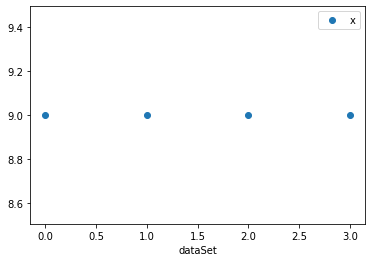

In [20]:
means.plot('dataSet', 'x', style='o')

<AxesSubplot:xlabel='dataSet'>

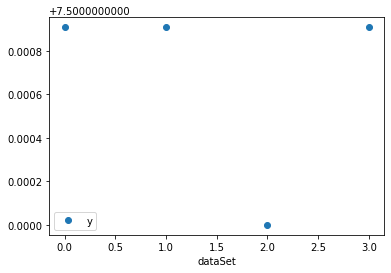

In [21]:
means.plot('dataSet', 'y', style='o')

In [22]:
variances = data.groupby('dataSet', as_index=False).var()
variances

,dataSet,x,y
0,0,11.0,4.127269
1,1,11.0,4.127629
2,2,11.0,4.122620
3,3,11.0,4.123249


<AxesSubplot:xlabel='dataSet'>

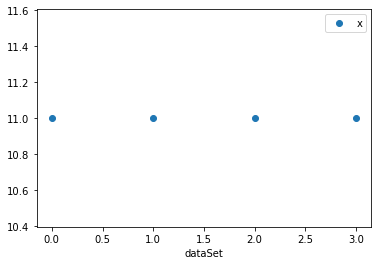

In [23]:
variances.plot('dataSet', 'x', style='o')

<AxesSubplot:xlabel='dataSet'>

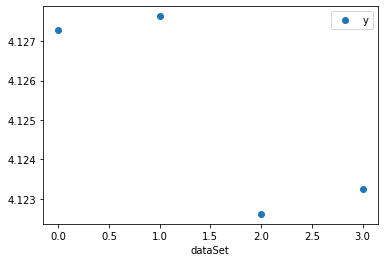

In [24]:
variances.plot('dataSet', 'y', style='o')

In [25]:
data.groupby('dataSet').cov()

x         y
dataSet                    
0       x  11.000  5.501000
        y   5.501  4.127269
1       x  11.000  5.500000
        y   5.500  4.127629
2       x  11.000  5.497000
        y   5.497  4.122620
3       x  11.000  5.499000
        y   5.499  4.123249

## Exercise 31

In [26]:
df = pd.read_csv("https://github.com/wkrzemien/dataScienceAndML2020/raw/master/datasets/iris_data.csv")
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [27]:
class KNN():
    def __init__(self, k=1):
        self.k = k
        
    def fit(self, x_train, y_train):
        # fit function in fact does not do much
        # as KNN is lazy learning
        self.x_train = x_train
        self.y_train = y_train
        
    def predict(self, x_test):
        ys_pred = []
        for test_row in x_test:
            dist = np.linalg.norm(test_row - self.x_train, ord=2, axis=1)
            labels = self.y_train[dist.argsort()][:self.k]
            y_pred, counts = np.unique(labels, return_counts=True)
            y_pred = y_pred[np.argsort(-counts)][:1]
            ys_pred.append(y_pred)
        return np.concatenate(ys_pred)

/tmp/ipykernel_7401/2944357633.py:46: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(x1s, x2s, mesh, cmap=cmap_light)


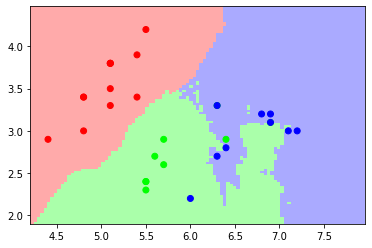

In [28]:
from sklearn.preprocessing import LabelEncoder
from matplotlib.colors import ListedColormap

features_to_plot = ['sepal_length', 'sepal_width']#, 'petal_length', 'petal_width']

# encode the classes
label_encoder = LabelEncoder()
label_encoder.fit(df['species'])
df['labels'] = label_encoder.transform(df['species'])

training_part = .8
ds_train = df.sample(frac=training_part)
ds_valid = df.drop(ds_train.index)

ds_train.reset_index(drop=True, inplace=True)
ds_valid.reset_index(drop=True, inplace=True)

x_train = ds_train[features_to_plot].to_numpy()
y_train = ds_train["labels"]
x_valid = ds_valid[features_to_plot].to_numpy()
y_valid = ds_valid["labels"]


model = KNN(k=10)
model.fit(x_train, y_train)
y_pred = model.predict(x_valid)

# colors found in the internet
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])


x1_lims = [x_train[:, 0].min() - .1, x_train[:, 0].max() + .1]
x2_lims = [x_train[:, 1].min() - .1, x_train[:, 1].max() + .1]
granul = 100
x1_thr = (x1_lims[1] - x1_lims[0]) / granul
x2_thr = (x2_lims[1] - x2_lims[0]) / granul
x1s, x2s = np.meshgrid(np.arange(x1_lims[0], x1_lims[1], x1_thr),
                       np.arange(x2_lims[0], x2_lims[1], x2_thr))

mesh = model.predict(np.c_[x1s.ravel(), x2s.ravel()])
mesh = mesh.reshape(x1s.shape)

plt.figure()
# plot the decision boundary
plt.pcolormesh(x1s, x2s, mesh, cmap=cmap_light)
# plot the points
plt.scatter(x_valid[:, 0], x_valid[:, 1], c=y_valid, cmap=cmap_bold)
plt.show()

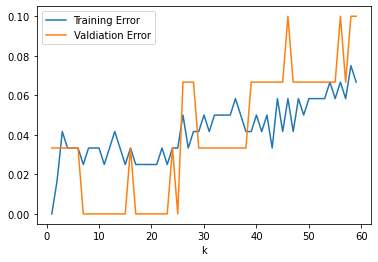

In [29]:
from sklearn.metrics import mean_squared_error as mse
testing_ks = np.arange(1, 60)

# include all features
features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

x_train = ds_train[features].to_numpy()
y_train = ds_train["labels"]
x_valid = ds_valid[features].to_numpy()
y_valid = ds_valid["labels"]

train_errors = []
valid_errors = []


for k in testing_ks:
    model = KNN(k=k)
    #model = KNeighborsClassifier(n_neighbors=k)
    model.fit(x_train, y_train)
    
    y_preds_train = model.predict(x_train)
    y_preds_valid = model.predict(x_valid)
    
    train_error = mse(y_train, y_preds_train)
    valid_error = mse(y_valid, y_preds_valid)
    
    train_errors.append(train_error)
    valid_errors.append(valid_error)

plt.figure()
plt.plot(testing_ks, train_errors, label='Training Error')
plt.plot(testing_ks, valid_errors, label='Valdiation Error')
plt.xlabel('k')
plt.legend()
plt.show()

## Exercise 32

We consider a linear regression model. Let’s assume that the error model is additive y
= f(x) + ε , and errors have Gaussian distribution with 0 mean (E[ε] =0) and variance
(Var[ε] =σ2). Show that the MLE approach leads to the same minimization problem as OLS
solution for the quadratic loss function L(Y,f(X))= (Y -f(X))2

In the standard OLS the minimization problem is:

$$ \min\;L(f(x), y) = \min\sum\limits_{i} (y - f(x_i))^2 $$

As for the MLE, in which we can use the fact that the Gaussian distributions are independent of each other.

$$ \max \mathrm{ln}\;L(f(x), y) =  \max \mathrm{ln}\;\mathrm{pdf}(f(x), y) = \max \mathrm{ln}\;\prod\limits_i\mathrm{pdf_i}(f(x), y)$$
$$ = \max \sum\limits_i \frac{1}{\sqrt{2\pi\sigma^2}} \exp{\frac{-(y-f(x_i))^2}{2\sigma^2}} $$ 
$$ \sim \max - \sum\limits_i(y-f(x))^2 = \min \sum\limits_i(y-f(x))^2 $$

## Exercise 33

Gauss-Markov theorem

Show that the ordinary least squares estimator has the lowest variance among all
unbiased linear estimators (is an “efficient” estimator) under the assumptions that:
- Its errors have zero expectation values
- its variances are equal.
- errors are uncorrelated

## Exercise 34

Implement the simple linear regression model
Test your implementation on the data x08.csv or x26.csv
Calculate the test and training errors

$$ \hat{\theta}=(\mathbf{X}^T\mathbf{X})^{-1}\mathbf{X}^T\mathbf{y}$$

In [30]:
def ols_prepare_x(x): # points [(x1, y1, z1, ...), (x2, y2, z2, ...), ...]
    return np.concatenate([np.ones((x.size, 1)), x], axis=1)

def ols_solution(x, y):
    x_b = ols_prepare_x(x)
    return np.linalg.inv(x_b.T @ x_b) @ x_b.T @ y

### Testing with a straight line

The optimal theta is: 
Theta_0: -4.0
Theta_1: 2.0


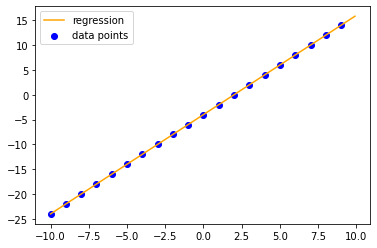

In [31]:
xs = np.arange(-10, 10) # points [(x1, y1, z1, ...), (x2, y2, z2, ...), ...]
ys = xs * 2 - 4 
theta_opt = ols_solution(np.expand_dims(xs, axis=-1), ys)
print("The optimal theta is: ")
for theta_id, theta in enumerate(theta_opt):
    print("Theta_{}: {}".format(theta_id, theta))


plt.figure()
plt.scatter(xs, ys, color='blue', label='data points')
x_test = np.arange(-10., 10., .1)
x_tmp = ols_prepare_x(np.expand_dims(x_test, axis=-1))
y_test = x_tmp @ theta_opt
plt.plot(x_test, y_test, color='orange', label='regression')
plt.legend()
plt.show()

### Testing with noise sampled from uniform distribution

The optimal theta is: 
Theta_0: -6.392036404087969
Theta_1: -3.0583771043366133


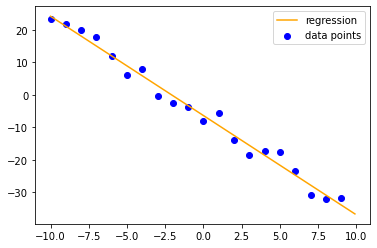

In [32]:
xs = np.arange(-10, 10) # points [(x1, y1, z1, ...), (x2, y2, z2, ...), ...]
ys = xs * (-3) - 6 + np.random.uniform(-4, 4, 20)
theta_opt = ols_solution(np.expand_dims(xs, axis=-1), ys)
print("The optimal theta is: ")
for theta_id, theta in enumerate(theta_opt):
    print("Theta_{}: {}".format(theta_id, theta))


plt.figure()
plt.scatter(xs, ys, color='blue', label='data points')
x_test = np.arange(-10., 10., .1)
x_tmp = ols_prepare_x(np.expand_dims(x_test, axis=-1))
y_test = x_tmp @ theta_opt
plt.plot(x_test, y_test, color='orange', label='regression')
plt.legend()
plt.show()

## Exercise 35

We consider two models for classification: (1) “flexible” (e.g. kNN) (2) “rigid ” (e.g.
linear). Discuss which would you typically choose in those situations:

1. A small number of training samples N
2. A large number of features
3. A large number of training samples N
4. Highly non-linear behavio

Answer:

1. Rigid, because flexible models will most likely overfit on a small number of training samples and the estimate will be unstable.

2. Flexible, provided that we have an adequate number of samples. If not, then rigid, because most of the samples will be treated as outliers, which is an effect caused by the so-called "curse of dimensionality".

3. Flexible, as we can try to find more complex relations in the dataset. Flexible models can adapt their complexity depending on the number of samples.

4. Flexible, as in rigid it might be difficult to define parameters that will encapsulate the complexity of the data.


## Exercise 36
Add feature scaling (standardization and normalization) for your k-NN implementation.
Check if it affects the results.

In [33]:
from sklearn.metrics import mean_squared_error as mse
testing_ks = np.arange(1, 60)

# include all features
features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

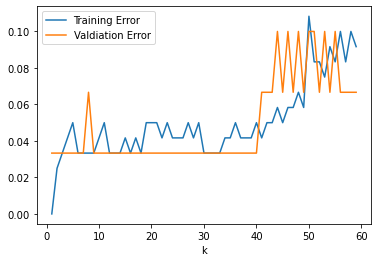

In [34]:
from sklearn.preprocessing import MinMaxScaler

x_train = ds_train[features].to_numpy()
y_train = ds_train["labels"]
x_valid = ds_valid[features].to_numpy()
y_valid = ds_valid["labels"]

scaler = MinMaxScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_valid = scaler.transform(x_valid)

train_errors = []
valid_errors = []


for k in testing_ks:
    model = KNN(k=k)
    #model = KNeighborsClassifier(n_neighbors=k)
    model.fit(x_train, y_train)
    
    y_preds_train = model.predict(x_train)
    y_preds_valid = model.predict(x_valid)
    
    train_error = mse(y_train, y_preds_train)
    valid_error = mse(y_valid, y_preds_valid)
    
    train_errors.append(train_error)
    valid_errors.append(valid_error)

plt.figure()
plt.plot(testing_ks, train_errors, label='Training Error')
plt.plot(testing_ks, valid_errors, label='Valdiation Error')
plt.xlabel('k')
plt.legend()
plt.show()

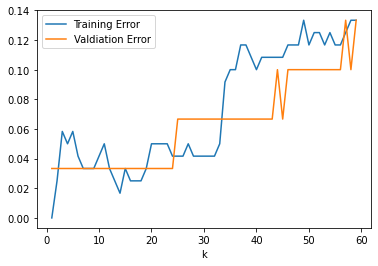

In [35]:
from sklearn.preprocessing import StandardScaler

x_train = ds_train[features].to_numpy()
y_train = ds_train["labels"]
x_valid = ds_valid[features].to_numpy()
y_valid = ds_valid["labels"]

scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_valid = scaler.transform(x_valid)

train_errors = []
valid_errors = []


for k in testing_ks:
    model = KNN(k=k)
    #model = KNeighborsClassifier(n_neighbors=k)
    model.fit(x_train, y_train)
    
    y_preds_train = model.predict(x_train)
    y_preds_valid = model.predict(x_valid)
    
    train_error = mse(y_train, y_preds_train)
    valid_error = mse(y_valid, y_preds_valid)
    
    train_errors.append(train_error)
    valid_errors.append(valid_error)

plt.figure()
plt.plot(testing_ks, train_errors, label='Training Error')
plt.plot(testing_ks, valid_errors, label='Valdiation Error')
plt.xlabel('k')
plt.legend()
plt.show()

## Exercise 38

When MAP and MLE give the same results?

MAP can be viewed as an extension of MLE with the prior.

$$ \Theta_{MAP} = \Theta_{MLE} + \mathrm{log}(p(\theta)) $$

So in other words, $ \Theta_{MAP} = \Theta_{MLE}$ when $\mathrm{log}(p(\theta)) = 0$

## Exercise 39

We want to check if the coin is fair, we estimate the frequency of heads.
Calculate the MAP maximum value estimator, when the prior distribution is described by
the beta function
pdf(p|α, β) = (α-1)!* ( β-1)!/(α+ β -1)! * pα-1 * (1-p)β-1

## Exercise 40

Consider the case of λ >> 1, and λ ≈ 0:
How does it affect the overfitting/bias problem ?
Will procedure work correctly anyway?
ET
[L(fθ(x) ,Y)] =1/(2*N) * ∑ (θTxi) -y(i))2 + λ/2 * ∑ θj

1. $\lambda = 0$, the model is more likely to overfit (high variance/low bias) as we do not restrict the parameters enough and the problem works as of there was no regularization applied.

2. $\lambda >> 1$, the model is dominated by the regularization term, ending up in high penalties even for small values of the parameters. We end up in high underfitting (high bias/low variance).

## Exercise 41
Read the code and try to understand how it works. By changing the values of degree
and alpha observe the interplay of overfitting/bias
- for which values one can obtained the reasonable fit to data ?
- plot the training and test errors as a function of polynomial degree (for fixed alpha)
- plot the training and test errors as a function of regularization term (for fixed
degree). 

Training error:0.39106938218265014
Test error:0.3706440862122376


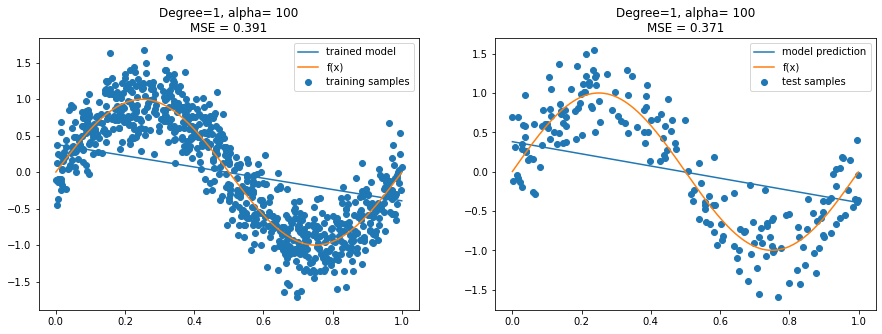

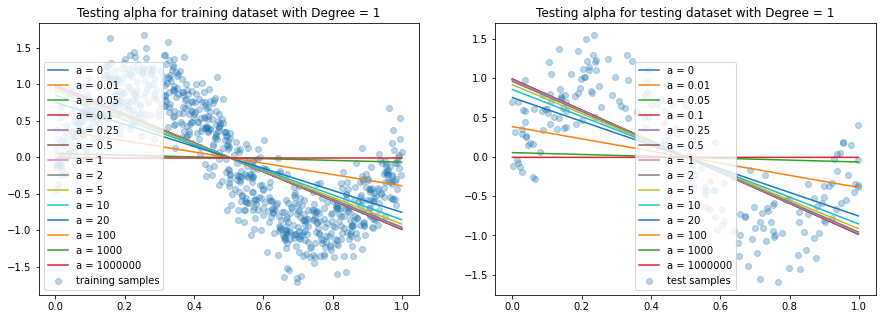

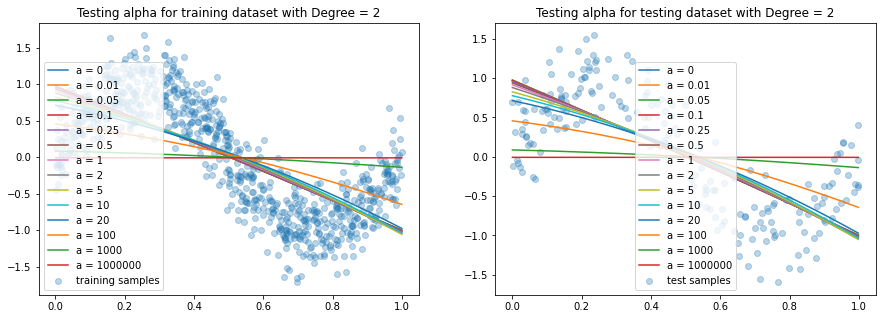

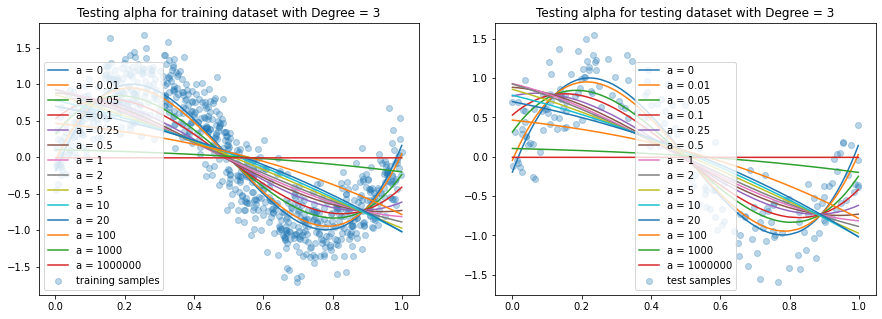

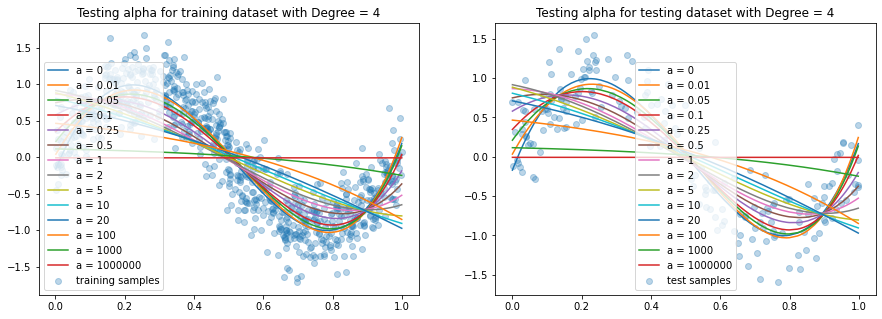

In [36]:
"""
  Simple regularization example
  The code serves only for educational purposes so it
  is not optimized in view of speed or numerical calculations.
  For the real problems you should always use algorithms.
  from known,  well tested libraries, wherever possible.
  Author: Wojtek Krzemien
  Date: 17.06 2018
  Usage: python  regularization.py
"""

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error


def sortXAndY(x,y):
    perm = x.argsort()
    return x[perm],y[perm] 

def true_f(x):
    return np.sin(2*np.pi*x)

def sampleWithNoise(nSamples = 100, noiseFraction = 0.3, f = true_f):
    x = np.sort(np.random.rand(nSamples))
    return x, f(x) + noiseFraction* np.random.normal(0,1,len(x))

# Number of samples.
samples = 1000
# Fraction which determines how noisy is or sampled model.
frac =0.3
# Polynomial degree used to fit the model.
polynomialDegree = 1
# If true the penalty term in the cost function will be used
withRegularization = True
# The regularization parameter, which determines the strength of the penalty term.
alpha = 100
# In what ratio our sample will be divided into the training and test sets
# e.g. 0.8 means 80% of sampels for training and 20% for evaluation.
trainTestSplit = 0.8

if not withRegularization:
    alpha = 0

# Get our samples from the model. For the model details please check.
# model.py.
x, y = sampleWithNoise(nSamples = samples, noiseFraction = frac)

# We split our samples into training and tests sets, the samples are chosen randomly.
xTrain, xTest, yTrain, yTest = train_test_split(x, y, train_size = trainTestSplit)

# We sort our divided sets to arrange them in order ascending order with respect to x.
xTrain,yTrain  = sortXAndY(xTrain,yTrain)
xTest,yTest  = sortXAndY(xTest,yTest)

# To use linear regression with the polynomial fit, we add polynomial features from
# our original ones.x1=x --> x1=x, x2=x^2, etc.  e.g. [[2]] - > [[2], [4]]
# Please note that also mixed terms will be used. For more details see:
# http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html
poly = PolynomialFeatures(degree=polynomialDegree, include_bias =False)
# The reshape(-1,1) is a technical trick necessary only in case if we have only one feature per sample.
xTrainPolynomial = poly.fit_transform(xTrain.reshape(-1, 1))
xTestPolynomial = poly.fit_transform(xTest.reshape(-1, 1))

reg = None
if withRegularization:
    # Ridge model is just linear regression + regularization term.
    reg = linear_model.Ridge (alpha = alpha)
else:
    reg = linear_model.LinearRegression()

# We train our model.
reg.fit(xTrainPolynomial,yTrain)
# We predict values from the training and test sets, based on our trained model.
yPredictTrain= reg.predict(xTrainPolynomial)
yPredictTest=reg.predict(xTestPolynomial)

# We calculate the train and test errors.
mseTrain = mean_squared_error(yTrain, yPredictTrain)
mseTest = mean_squared_error(yTest, yPredictTest)

print("Training error:" + str(mseTrain))
print("Test error:" + str(mseTest))

#******Plotting part******
plt.figure(1, figsize=(15, 5))
plt.subplot(121)

plt.title("Degree={}, alpha= {}\nMSE = {:.3}".format(
polynomialDegree , alpha, mseTrain))
plt.scatter(xTrain, yTrain, label = "training samples")
plt.plot(xTrain, yPredictTrain, label='trained model')
plt.plot(x, true_f(x), label="f(x)")
plt.legend(loc="best")


plt.subplot(122)
plt.title("Degree={}, alpha= {}\nMSE = {:.3}".format(
polynomialDegree , alpha, mseTest))
plt.scatter(xTest, yTest, label = "test samples")
plt.plot(xTest, yPredictTest, label='model prediction')
plt.plot(x, true_f(x), label="f(x)")
plt.legend(loc="best")
plt.show()


#
for polynomialDegree in [1, 2, 3, 4]:
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5)) 


    poly = PolynomialFeatures(degree=polynomialDegree, include_bias =True)
    xTrainPolynomial = poly.fit_transform(xTrain.reshape(-1, 1))
    xTestPolynomial = poly.fit_transform(xTest.reshape(-1, 1))

    ax1.scatter(xTrain, yTrain, label = "training samples", alpha=.3)
    ax2.scatter(xTest, yTest, label = "test samples", alpha=.3)
    for alpha in [0, .01, .05, .1, .25, .5, 1, 2, 5, 10, 20, 100, 1000, 1000000]:
        reg = None
        if withRegularization:
            # Ridge model is just linear regression + regularization term.
            reg = linear_model.Ridge (alpha = alpha)
        else:
            reg = linear_model.LinearRegression()

        # We train our model.
        reg.fit(xTrainPolynomial,yTrain)
        # We predict values from the training and test sets, based on our trained model.
        yPredictTrain= reg.predict(xTrainPolynomial)
        yPredictTest=reg.predict(xTestPolynomial)

        ax1.set_title("Testing alpha for training dataset with Degree = {}".format(polynomialDegree))
        ax1.plot(xTrain, yPredictTrain, label='a = {}'.format(alpha))
        ax1.legend(loc="best")
        #plt.plot(x, true_f(x), label="f(x)")
        #plt.legend(loc="best")


        #plt.subplot(122)
        #plt.title("Degree={}, alpha= {}\nMSE = {:.3}".format(
        #polynomialDegree , alpha, mseTest))
        ax2.set_title("Testing alpha for testing dataset with Degree = {}".format(polynomialDegree))
        ax2.plot(xTest, yPredictTest, label='a = {}'.format(alpha))
        #plt.plot(x, true_f(x), label="f(x)")
        ax2.legend(loc="best")
    plt.show()


## Exercise 42

We consider a linear regression model. Let’s assume that the error model is additive y
= f(x) + ε , and errors are have Gaussian distribution with 0 mean (E[ε] =0) and variance
(Var[ε] =σ2). We In addition, assume that our parameters are described by:
1. Gaussian Distribution, with 0 mean, and some variance
2. Laplace Distribution, with 0 mean, and some variance

Derive the minimization problem starting from the MAP approach, taking into account the
prior distribution of the parameters.

Using the fact that MAP optimization problem can be viewed as an extension to MLE:

$$\Theta_{MAP} = \Theta_{MLE} + \arg \max \mathrm{log}\;p(\theta)$$

and the fact that MLE for the linear regression model with Gaussian errors looks like:

$$\Theta_{MLE} \sim  \arg \min \sum\limits_i(y-f(x))^2 $$ 

we can write a general solution

$$\Theta_{MAP} \sim \arg \max \bigl( -\sum\limits_i(y-f(x))^2 +  \mathrm{log}\;p(\theta) \bigr)$$

1) Gaussian distribution of the prior:

$$\Theta_{MAP} = \arg \min \bigl( a \sum\limits_i(y-f(x))^2 + b \sum \theta_i^2  \bigr)$$

1) Laplace distribution of the prior:

$$\Theta_{MAP} = \arg \min \bigl( a \sum\limits_i(y-f(x))^2 + b \sum |\theta_i| \bigr)$$

## Exercise 43

We consider a classification model with some regularization scheme. Which statements
are true? Justify your choice.
- Adding regularization would typically lower the training error

Not true, regularization in general lowers the testing error, but makes the training error a bit bigger.

- Adding new features to your model would make the training error higher or the same

Not true, increasing the complexity of the model makes it easier to overfit (fit better to the training data, but with low generality)

- Adding regularization would typically lower the test error

True. We put additional constraints on the cost function, so it's more difficult to overfit.

- Adding regularization can cause overfitting of your model

Not true. The whole idea of adding the regularization is to fight with the overfitting.

- Using a large value of the lambda parameter can cause the overfitting of your
model

Not true, rather it can cause underfitting (high bias).

- Adding regularization can introduce the bias to your model

True, the whole term is positive and thus adds bias (it is a function parameters only).

- Adding regularization can make the training error higher

True, in the case where the regularization dominates the cost function for example.

## Exercise 44

Calculate the derivative of the sigmoid function and express it using the sigmoid

$$ \frac{\mathrm{d}}{\mathrm{d}x}  \sigma(x) = \frac{\mathrm{d}}{\mathrm{d}x}  \frac{1}{1+e^{-x}} = \frac{-1}{1+e^{-x}}  \frac{-e^{-x}}{1+e^{-x}} = \frac{1}{1+e^{-x}} \bigl( 1 - \frac{1}{1+e^{-x}}\bigr) = \sigma(x)(1-\sigma(x))$$

## Exercise 45

Assuming the loss function definition as:
L(fθ(x),Y) = - log fθ (x) for Y=1
             - log (1 -fθ(x)) for Y=0
, what are the loss values for:
1. fθ(x) =0, Y=0
2. fθ(x) =1, Y=0
3. fθ(x) =0, Y=1
4. fθ(x) =1, Y=1

Draw L as a function of fθ(x) for Y= 0 and Y=1


$$ L(f_\theta(x), Y) = \begin{cases} -\mathrm{log}\;f_\theta(x) & \text{for } Y=1 \\ -\mathrm{log}\;(1 - f_\theta(x)) & \text{for } Y=0  \end{cases}$$

1. $L(0, 0) = 0$
2. $L(1, 0) = \infty$
3. $L(0, 1) = \infty$
4. $L(1, 1) = 0$



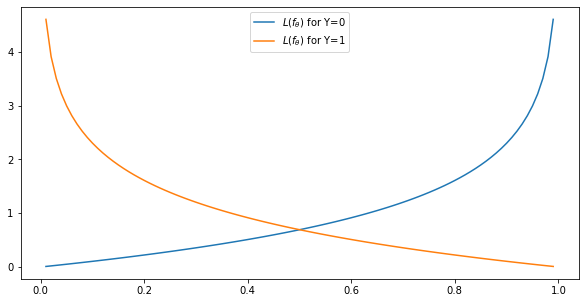

In [37]:
def L(ft, y=0):
    return -np.log(ft) if y==1 else -np.log(1. - ft)

fig, ax = plt.subplots(1, 1, figsize=(10, 5)) 
ft = np.arange(.01, .999, .01)
ax.plot(ft, L(ft, y=0), label=r'$L(f_\theta)$ for Y=0')
ax.plot(ft, L(ft, y=1), label=r'$L(f_\theta)$ for Y=1')
plt.legend()
plt.show()


## Exercise 46
Calculate the equation of the decision boundary for the logistic regression model
assuming:
- fθ(x) >=0.5 → Y=1
- fθ(x) < 0.5 → Y=0
  
  
$$ \frac{1}{2} = \frac{1}{1+e^{-x}} $$

$$1+e^{-x} = 2 $$

$$ e^{-x} = 1 $$

$$ x = 0 $$

## Exercise 47

- For which value of K K-fold cross-validation is equivalent to Leave-one-out method?

When K is equal to the number of training data samples. We divide the training samples into K groups, so the maximum number of groups is when in each we have 1 training sample.

- Order the cross-validation methods (K-fold e.g. K=5, leave-one-out and the simple splitting into validation and training sets) in the ascending cost of the computation power

simple splitting < k=5 < leave-one-out

- For which K the K-fold cross-validation requires the most of the computing power?

When K is equal to the number of training data samples. We have to N times repeat the training scheme.


Justify your answers

## Exercise 48

We consider two cases of binary classifier tests:
- A - airplanes security checks before the take-off (Y=’allowed’/’denied’)
- B - decision if according to her/his profile a client will be potentially interested to buy a new product and if to show her/him the targeted advertisement(Y=’yes’/’no’) 

How would we decide how to tune our classifier threshold for each case in the context of sensitivity vs specificity trade-off. Justify your answer.

1. A - we want to minimize the number of people that shouldn't enter the airplane, but were perceived as allowed. Thus we want to maximize the number of true negatives with low false positives. That means we want to monitor specificity more.

2. B - in this case we want to make sure that the clients we target are those that are really interested. In the other case we would just waste time. In this case sensitivity is more important.

## Exercise 49
Discuss the performance of different classification models (A-E)
![pic](example_curve.png)

- A - decent classifier, more sensitivity than specificity
- B - decent classifier, more specificity than sensiticity
- C - classifier is random
- D - perfect classifier
- E - classifier performs worse than random


## Exercise 50

We have k=10 classes and a binary model.
How many comparisons do we need to perform using all-vs-one approach?

10 comparisons.

## Exercise 51
Implement the gradient descent algorithm for simple linear regression:
start with some initial θ1
 , θ0
for every iteration θk
 = θk – α * ∂E(θ)/∂θk
 k=0,1 ,α – learning rate
Test your implementation with some data (e.g. x03.csv) and compare with analytical
solution:
- plot E(θk) vs iteration
- plot θk vs iteration 

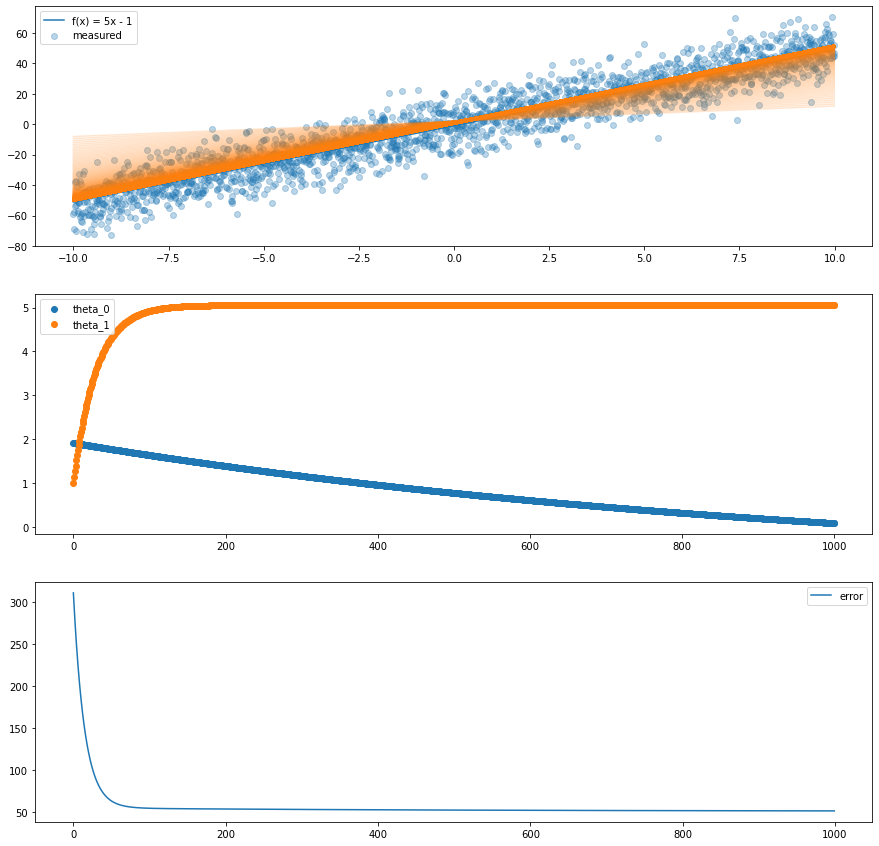

In [38]:

def gd(x, y, th, lr=.01, its=10):
    ths = [th]
    costs = []
    n = x.shape[0]
    for it in range(its):
        th = th - (lr / n * x.T @ (x @ th - y))
        ths.append(th)
        costs.append( 1. / n / 2. * np.sum(np.square(x @ th - y)))
    return ths, costs

xt_t = np.arange(-10, 10, .01)
xt = np.expand_dims(xt_t, axis=-1) # n x p
xt = np.concatenate([np.ones((xt.size, 1)), xt], axis=1)

opt = np.array([[-1], [5]]) # p x 1, 
f = xt @ opt
y = f + np.random.normal(0, 10, (f.shape[0], 1))
th = np.expand_dims(np.random.uniform((opt.shape[0], 1)), axis=-1)

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(15, 15)) 
ax1.plot(np.squeeze(xt_t), np.squeeze(f), label="f(x) = 5x - 1")
ax1.scatter(np.squeeze(xt_t), np.squeeze(y), label="measured", alpha=.3)

ths, costs = gd(xt, y, th, lr=1e-3, its= 1000)
for th_id, th in enumerate(ths):
    ax1.plot(np.squeeze(xt_t), np.squeeze(xt @ th), color="C1", alpha=(.8 * th_id/len(ths) + .2))

ax1.legend()
ax2.scatter(np.arange(0, len(ths)), np.array(ths)[:, 0], label='theta_0')    
ax2.scatter(np.arange(0, len(ths)), np.array(ths)[:, 1], label='theta_1')
ax2.legend()

ax3.plot(np.arange(0, len(costs)), np.array(costs), label='error')
# # ax.plot(opts, f(opts), color="C1")
# # ax.scatter(opts, f(opts), color="C1", label="iterations")
# plt.legend()
ax3.legend()
plt.show()

## Exercise 52
Implement the Newton method :
Test your implementation with some data (e.g. x03.csv) and compare with analytical
solution:
- plot E(θk) vs iteration
- plot θk vs iteration 

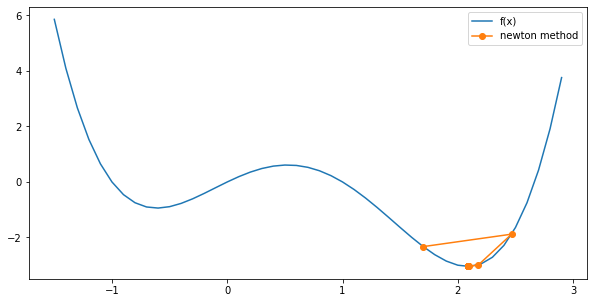

In [39]:
def f(x):
    # function with a saddle point
    return .75 * x**4 - 2. * x**3 - .75 * x**2 + 2 * x

def df(x):
    return 3 * x**3 - 6 * x**2 - 1.5 * x + 2

def ddf(x):
    return 9 * x**2 - 12 * x - 1.5

def newton(x_init, its=100):
    x = x_init
    xs = [x]
    for it in range(its):
        x = x - df(x) / ddf(x)
        xs.append(x)
    return xs

xs = np.arange(-1.5, 3, .1)
ys = f(xs)
xsn = np.array(newton(1.7))
ysn = f(xsn)
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.plot(xs, ys, label="f(x)", color="C0")
ax.plot(xsn, ysn, label="newton method", color="C1", marker='o')
plt.legend()
plt.show()

    

## Exercise 53

For which method, there is a guarantee that it will converge to the global minimum.
Justify your choice if possible:
- GD
- SGD
- ADAM
- Newton’s method
- All of them
- None of them

None of them. Only some of them include randomization and are less susceptible to fall into local minima.

## Exercise 54

We use a large dataset with a multidimensional features space. Which method would
be probably appropriate to use? Justify your choice if possible


My choice would be ADAM.

- GD - slow for many training samples
- SGD - quite accurate and fast
- ADAM - a bit better than SGD 
- Newton’s method - fast in convergence, but involves additional information about second derivatives which might be difficult to obtain for high-dimensional parameter space
- All of them
- None of them

## Exercise 55

Which of the statements are true?

- SGD is guaranteed to decrease the cost function in every iteration

Not true, we are only probing part of the space available and thus we may increase or even skip minima.

- SGD uses small subsample (or one sample) to update the parameters

True, it uses one training sample.

- When using SGD we don't need to randomize the data sample

False, SGD might favor local minima and get stuck there.

- When using GD we don't need to randomize the data sample

True, we use the whole dataset in one go.

## Exercise 56

Which of the statements are true?

- GD with a very small learning rate can be ineffective in a sense that it would take a lot of time to find the solution (to converge)

True, gradient descent is quite accurate, but slow. Lowering the learning rate means we converge even slower.


- SGD with a very large learning rate can be ineffective in a sense that it would take a lot of time to find the solution (to converge)

False, because with the large learning rate we might be even jumping over the minima and thus not getting convergence.


- If we choose small enough learning rate, then we are guaranteed to converge to the same solution independent on the initial values

False, the initial values tell us where we are in the parameter manifold that might be very complex. 

- When the value of learning rate is too large then we can "overshoot" the solution

True, for example if the step is bigger than the size of the "valley" with the minimum in the manifold.

## Exercise 57

Which of the statements are true?
- Newton's method uses information about the Hessian

True, when finding the minimum/maximum and not the root.

- GD uses information about the Hessian

Not true, just the gradient.

- Newton' method in many cases can converge faster than GD but it can be very expensive for multidimensional data

True, inverting multidim. Hessian might be computationally expensive.

## Exercise 58

Consider document classifier with k classes. Every document is described by at least p
ordered words (features). Every word belongs to the dictionary of m values. How many
parameters we must estimate for:
- Bayes classifier
- Bayes classifier with the bag-of-model assumption
- Naive Bayes classifier with the bag-of-model assumption

## Exercise 59

Consider Laplacian smoothing for k =2. Discuss cases of:
- α =0.5
- α =1
- α =0
with respect to freqency prediction #xi/#y

- $\alpha=0$ no smoothing at all 
- $\alpha=1/2$ smooting on
- $\alpha=1$ also called "rule of succession", which helps in getting the probability of missing observations provided that we measured it n times in raw

## Exercise  61

Assuming the 1-D box kernel with the width w=2 and the following set of data xi =
[1,2.5, 3,3.5,4,6,6.5,7,9], use KDE method to estimate pdf for points:
- f(0.5)
- f(4)
- f(10)

In [40]:
import math
def box_kernel(x):
    xt = x
    support = (-1 <= xt) & (xt <= 1)
    xt[support] = .5
    xt[~support] = 0.
    return xt

def gaussian(x, sigma):
    return np.sqrt(.5 / math.pi) / sigma * np.exp(- x**2 / 2. / sigma**2 )

def gaussian_kernel(x):
    return gaussian(x, 1.)

def vkde(xs, kernel=gaussian_kernel, w=0.1):
    kde = lambda x: np.mean(kernel((x - xs) / w)) / w
    return np.vectorize(kde)(xs)

# function to test the generation
def gaussian_gen(shape, means=[], stds=[]):
    gaussians = []
    for mean, std in zip(means, stds):
        gaussians.append(np.random.normal(mean, std, shape))
    return np.concatenate(gaussians)

def gaussians_p(x, means=[], stds=[]):
    gaussians = np.zeros(x.shape)
    for mean, std in zip(means, stds):
        gaussians = gaussians + gaussian(x - mean, std)
    return gaussians / len(means)
    


In [41]:
points = [1, 2.5, 3, 3.5, 4,6,6.5,7,9]
points=np.array(points)

est_points = [.5, 4, 10]
for est_point in est_points:
    pts = np.append(points, est_point)
    sol = vkde(pts, kernel=box_kernel, w=2)
    sol = sol[-1]
    print("KDE f({}) = {}".format(est_point, sol))


KDE f(0.5) = 0.075
KDE f(4) = 0.15
KDE f(10) = 0.05


## Exercise  62

Write a program that implements 1-D KDE estimation. Plot the estimated pdf for the
box kernel and the sample data. Plot the same pdf using the gaussian kernel instead.

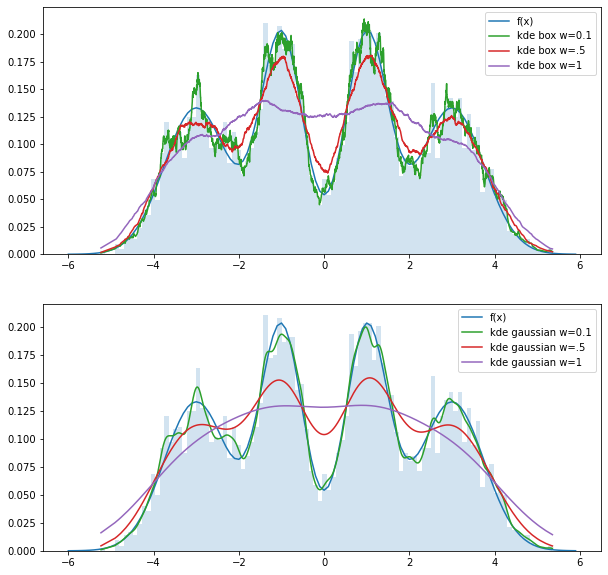

In [42]:

xs = np.arange(-6, 6, .1)
fs = gaussians_p(xs, means=[-3, -1., 1., 3.], stds=[.75, .5, .5, .75])
gens = gaussian_gen(1000, means=[-3, -1., 1., 3.], stds=[.75, .5, .5, .75])
gens = np.sort(gens)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10))
ax1.plot(xs, fs, label="f(x)", color="C0")
ax1.hist(gens, bins=100, density=True, color="C0", alpha=.2)
ax1.plot(gens, vkde(gens, kernel=box_kernel, w=.1), label="kde box w=0.1", color="C2")
ax1.plot(gens, vkde(gens, kernel=box_kernel, w=.5), label="kde box w=.5", color="C3")
ax1.plot(gens, vkde(gens, kernel=box_kernel, w=1), label="kde box w=1", color="C4")
ax1.legend()
ax2.plot(xs, fs, label="f(x)", color="C0")
ax2.hist(gens, bins=100, density=True, color="C0", alpha=.2)
ax2.plot(gens, vkde(gens, w=.1), label="kde gaussian w=0.1", color="C2")
ax2.plot(gens, vkde(gens, w=.5), label="kde gaussian w=.5", color="C3")
ax2.plot(gens, vkde(gens, w=1), label="kde gaussian w=1", color="C4")
# ax2.plot(gens, vkde(gens, w=1000), label="kde gaussian w=1000", color="C5")
ax2.legend()
plt.show()
    

## Exercise 63

Implement a program to calculate the integral of f(x) =cos(x) and x in [0,pi/2] using MC
integration

Expected integral is 0.9303591991332273
Analytical solution is 1.0


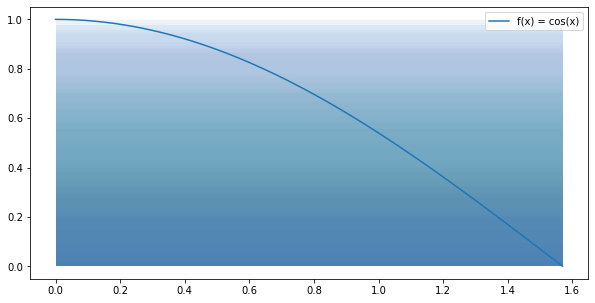

In [43]:
from matplotlib.patches import Rectangle

def f(x):
    return np.cos(x)

def estimator(x, a, b, func=f):
    return (b - a) * np.mean(func(x))

points_to_generate = 100
a, b = [0, np.pi / 2.]
xst = np.arange(a, b, .01)
yst = f(xst)

xs = np.random.uniform(a, b, points_to_generate)

print("Expected integral is {}".format(estimator(xs, a, b)))
print("Analytical solution is {}".format(np.sin(b) - np.sin(a)))
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.plot(xst, yst, label="f(x) = cos(x)")
for x in xs:
    ax.add_patch(Rectangle((a, 0), (b-a), f(x),  fill=True, alpha=0.01) )
ax.legend()
plt.show()
    
    

## Exercise 64

Show that MC integral error decreases as 1/sqrt(N)

$$ F = \frac{b - a}{n} \sum\limits_{i=i}^{n} f(x_i) $$

$$ \mathrm{var}(F) = \Bigl(\frac{b - a}{n}\Bigr)^2 \sum\limits_{i=i}^{n} \mathrm{var}(f) = \frac{(b - a)^2}{n}\mathrm{var}(f) = \frac{(b - a)^2}{n}\sigma^2$$

$$\delta E(n) = (b - a)\sigma \frac{1}{\sqrt{n}} $$

## Exercise 65
Write a random generator using rejection sampling method for f(x) = sin (x) and x in
[0,pi/2]

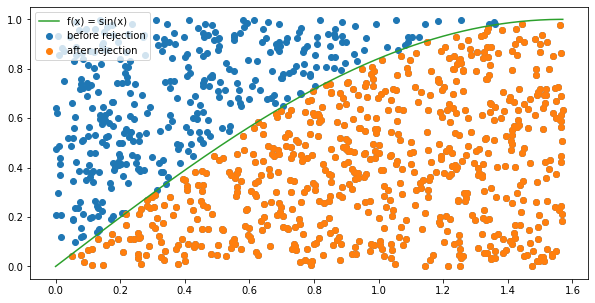

In [44]:
y_lim = [0, 1]
x_lim = [0, math.pi / 2.]
points = 1000
def f(x):
    return np.sin(x)


ys = np.random.uniform(*y_lim, points)
xs = np.random.uniform(*x_lim, points)
fs = f(xs)
reject_mask = ys < fs
xsr = xs[reject_mask]
ysr = ys[reject_mask]

fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.scatter(xs, ys, color="C0", label="before rejection")
ax.scatter(xsr, ysr, color="C1", label="after rejection")
xst = np.arange(*x_lim, 0.01)
ax.plot(xst, f(xst), color="C2", label="f(x) = sin(x)")
ax.legend()
plt.show()

Pi = 3.1276


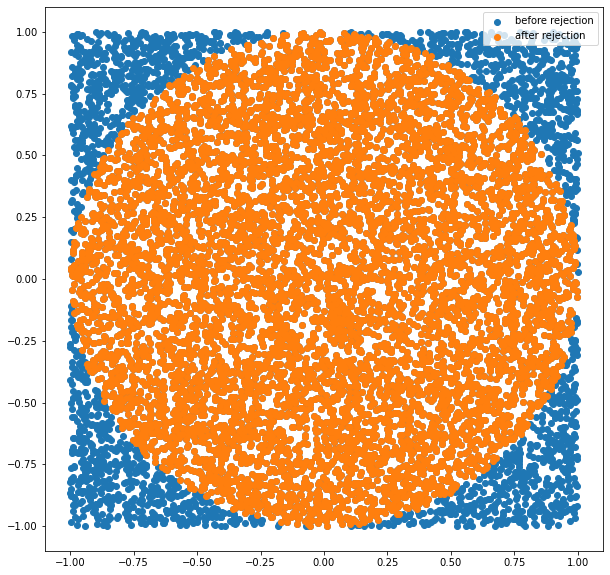

In [45]:
y_lim = [-1, 1]
x_lim = [-1, 1]
points = 10000
def f(x, y):
    return np.square(x) + np.square(y)


ys = np.random.uniform(*y_lim, points)
xs = np.random.uniform(*x_lim, points)
fs = f(xs, ys)
reject_mask = fs < 1
xsr = xs[reject_mask]
ysr = ys[reject_mask]
fsr = fs[reject_mask]
print("Pi = {}".format(fsr.size / fs.size * 4.))
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.scatter(xs, ys, color="C0", label="before rejection")
ax.scatter(xsr, ysr, color="C1", label="after rejection")
ax.legend()
plt.show()

## Exercise 66

Write a random generator that generates exponential distribution using inverse
sampling

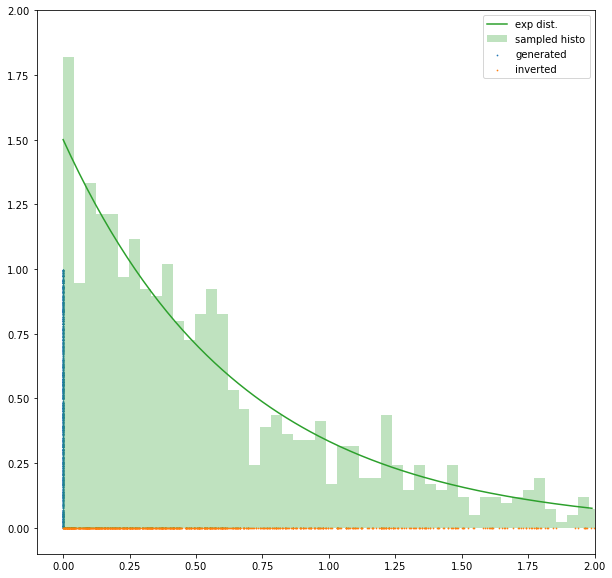

In [46]:
y_lim = [0, 1]

points = 1000

def pdf(x, plambda=.5):
    return plambda * np.exp(-plambda * x)

def cdf1(x, plambda=.5):
    return -1./plambda * np.log(1. - x)

plambda=1.5
ys = np.random.uniform(*y_lim, points)
xs = cdf1(ys, plambda=plambda)


fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.scatter(np.zeros(ys.shape), ys, color="C0", label="generated", s=.5)
ax.scatter(xs, np.zeros(xs.shape), color="C1", label="inverted", s=.5)
xt = np.arange(0, 2., 0.01)
ax.plot(xt, pdf(xt, plambda=plambda), label="exp dist.", color="C2")
ax.hist(xs, color="C2", density=True, bins=100, label="sampled histo", alpha=.3)
ax.set_xlim(-.1, 2.0)
ax.set_ylim(-.1, 2.0)
ax.legend()
plt.show()

## Exercise 68

Give examples of the NN weights values that would act as OR and NOT gates

Assuming the threshold function (perceptron).

$$ f(\theta) = \begin{cases} 1 & \text{if }\theta^T x > 0 \\ 0 & \text{otherwise} \end{cases} $$

1. AND gate

example: $\theta = (-2, 2, 2)^T $

2. OR gate

example: $\theta = (-2, 3, 3)^T $

## Exercise 69

Calculate derivatives of the activation functions and express it (if possible) by the
function itself.

Choosing 3 activation functions:

1. sigmoid (previously computed)
$$ \frac{\mathrm{d}}{\mathrm{d}x} \sigma(x) = \sigma(x)(1-\sigma(x)) $$

2. tanh 

$$ \tanh(x) =  \frac{e^x - e^{-x}}{e^x + e^{-x}} $$

$$ \frac{\mathrm{d}}{\mathrm{d}x} \tanh(x) = \frac{(e^x + e^{-x})(e^x + e^{-x}) - (e^x - e^{-x})(e^x - e^{-x})}{(e^x + e^{-x})^2} = 1 - \frac{(e^x - e^{-x})^2}{(e^x + e^{-x})^2} = 1 - \tanh^2(x)$$

3. ReLU

$$ f(x) = \begin{cases} x & \text{if x } \geq 0 \\ 0 & \text{otherwise} \end{cases} $$
$$ \frac{\mathrm{d}}{\mathrm{d}x} f(x) = \begin{cases} 1 & \text{if x } \geq 0 \\ 0 & \text{otherwise} \end{cases} $$

## Exercise 70

Calculate the backpropagation for logistic regression model

The loss function in the logistic regression is given by:

$$ L(y, f(x)) = -y\mathrm{log}(\sigma(f(x))) + (1-y)\mathrm{log}(1-\sigma(f(x))) $$

$$ f(x) = \theta x + b  $$

$$ \frac{\partial L}{\partial \theta} = \frac{\partial L}{\partial \sigma} \frac{\partial \sigma}{\partial f}  \frac{\partial f}{\partial \theta}$$

$$ \frac{\partial L}{\partial b} = \frac{\partial L}{\partial \sigma} \frac{\partial \sigma}{\partial f}  \frac{\partial f}{\partial b}$$

so we have:

$$ \frac{\partial L}{\partial \sigma} = \frac{-y}{\sigma} + \frac{1-y}{1-\sigma} $$

$$ \frac{\partial \sigma}{\partial f} = \sigma(1-\sigma) $$

$$ \frac{\partial L}{\partial \sigma} \frac{\partial \sigma}{\partial f}  = \sigma - y $$

thus 

$$ \frac{\partial L}{\partial b} = \sigma - y $$

$$ \frac{\partial L}{\partial \theta} = (\sigma - y)x $$